### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 20
generations = 1000
name = 'centered5'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize)

2023-02-13 11:30:58,120	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-13 11:31:00] INFO     <92598> evotorch.core: Instance of `Custom_NEProblem` (id:4416608656) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-13 11:31:00] INFO     <92598> evotorch.core: Instance of `Custom_NEProblem` (id:4416608656) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-13 11:31:00] INFO     <92598> evotorch.core: Instance of `Custom_NEProblem` (id:4416608656) -- The `device` of the problem is set as cpu
[2023-02-13 11:31:00] INFO     <92598> evotorch.core: Instance of `Custom_NEProblem` (id:4416608656) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-13 11:31:00] INFO     <92598> evotorch.core: Instance of `Custom_NEProblem` (id:4416608656) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0389)
    mean_eval : -600.5889892578125
  median_eval : -602.582275390625
pop_best_eval : -589.0372314453125
    best_eval : -589.0372314453125
   worst_eval : -603.5182495117188

         iter : 2
     stepsize : ReadOnlyTensor(0.0380)
    mean_eval : -1174.053466796875
  median_eval : -1177.542236328125
pop_best_eval : -1151.904052734375
    best_eval : -589.0372314453125
   worst_eval : -1181.3841552734375

         iter : 3
     stepsize : ReadOnlyTensor(0.0372)
    mean_eval : -1939.823486328125
  median_eval : -1943.7845458984375
pop_best_eval : -1917.1024169921875
    best_eval : -589.0372314453125
   worst_eval : -1950.393310546875

         iter : 4
     stepsize : ReadOnlyTensor(0.0366)
    mean_eval : -1724.744140625
  median_eval : -1723.6422119140625
pop_best_eval : -1699.5166015625
    best_eval : -589.0372314453125
   worst_eval : -1950.393310546875

         iter : 5
     stepsize : ReadOnlyTensor(0.0361)
    mean_eval

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'])

#### Visualize trained network

In [6]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer()

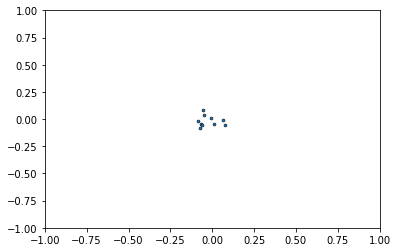

In [7]:
anim = visualizer.animate_organism(graph, network, food=30, frames=300)
visualizer.save_animation_to_gif(anim, name, 10)

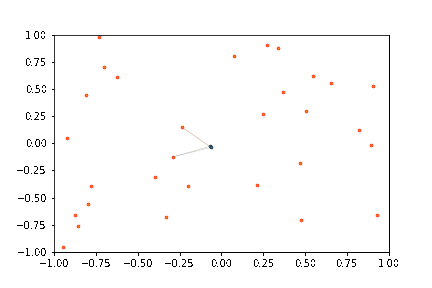

In [8]:
Image('../animation/' + name + '.gif')

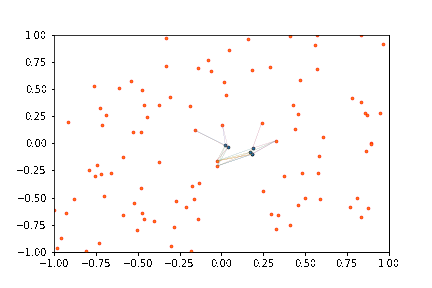

In [9]:
Image('../animation/GATConv1.gif')

In [10]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [11]:
print(network)

GNCA(
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=6, out_features=6, bias=True)
    (2): ReLU()
    (3): Linear(in_features=6, out_features=3, bias=True)
    (4): ReLU()
  )
  (conv_layers): GATv2Conv(6, 6, heads=1)
)


In [12]:
print(network.conv_layers)
for param in network.conv_layers.parameters():
  print(param.data)

GATv2Conv(6, 6, heads=1)
tensor([[[ 0.0701,  0.0182,  0.0853, -0.8199, -0.5317, -0.4816]]])
tensor([-6.5414e-01, -1.1237e-03,  1.3220e+00,  4.7280e-01,  3.8337e-02,
         7.0414e-01])
tensor([[-0.1154,  0.7953, -1.2805,  0.2516, -0.4980,  0.4533],
        [-0.8285,  0.1518, -0.3509,  0.0238,  0.1703,  0.1049],
        [-0.3522, -0.6286,  0.1035,  0.3189, -0.3880,  0.6272],
        [-0.1587, -0.2314, -0.2069, -0.4784,  0.0567,  0.1662],
        [ 0.4658, -0.3722, -0.1713,  0.3415, -0.1235,  0.3597],
        [-0.2199,  0.5218, -0.5156,  1.0669, -0.3111, -0.9851]])
tensor([ 0.0827,  0.5406,  0.2826, -0.3086,  0.3589, -0.3976])
tensor([[-0.3917, -0.1705, -0.6497, -0.1876,  0.4175, -0.6016],
        [ 0.0857, -0.7272, -0.9378,  0.2833, -0.5196,  0.0673],
        [ 0.0845, -0.0085, -0.5059,  0.2785,  0.2697, -0.2983],
        [-0.8175,  0.4363, -0.2483,  0.5403, -0.1945,  0.4001],
        [-0.3115, -0.4008, -0.1752, -0.3519, -0.3278, -0.1435],
        [ 0.5192,  0.4351,  0.0276,  0.0650, 

In [13]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>